In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    for i in range(W.shape[0]):
        W[i,i] = 0
    return W

def recall(x,W):
    
    x = x.reshape((-1,1))
    #print(x)
    #print(W.shape)
    #x = np.sign(np.matmul(W.T,x))
    
    for i in range(x.shape[0]):
        x[i] = np.sign(np.dot(x.T,W[i,:]))
    return x


def find_pattern(x, W, epochs):
    for i in range(epochs):
        x = recall(x,W)
    return x

def recall_async(x,W):
    order = np.arange(W.shape[0]) 
    np.random.shuffle(order)
    #print(x)
    
    for i in order:
        #print(np.sum(W[i,:]*x))
        if np.sum(W[i,:]*x)>0: 
            x[i] = 1
        else:
            x[i] = -1
    return x


def calculate_energy(x,W):
    E_s = np.zeros(W.shape[0])
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            E_s[i] = E_s[i] + W[i,j]*x[i]*x[j]
    E = - np.sum(E_s)
    return E

# 3.3.1-2

In [11]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
train_X = data[0:3].copy()
print(train_X.shape)
W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)
epochs = 20
for i in range(data.shape[0]):
    E = calculate_energy(data[i],W)
    print("Energy for data ", i, "is equal to ", E)

(11264,)
(11, 1024)
(3, 1024)
Energy for data  0 is equal to  -1470864.0
Energy for data  1 is equal to  -1395344.0
Energy for data  2 is equal to  -1494272.0
Energy for data  3 is equal to  -734700.0
Energy for data  4 is equal to  -535440.0
Energy for data  5 is equal to  -696624.0
Energy for data  6 is equal to  -699116.0
Energy for data  7 is equal to  -172592.0
Energy for data  8 is equal to  -270860.0
Energy for data  9 is equal to  -422892.0
Energy for data  10 is equal to  -174592.0


# 3.3.3

In [16]:
def find_pattern_async_energy(x, W, epochs):
    arr = np.arange(10)
    energy_s = np.zeros(epochs)
    for i in range(epochs):
        x = recall_async(x,W)
        E = calculate_energy(x,W)
        energy_s[i] = E
        print(E)
        
        plt.figure()
        #    plt.imshow(x.reshape((32,32)))
    return x, energy_s

(11264,)
(11, 1024)
(3, 1024)
-1413772.0
-1494272.0
-1494272.0
-1494272.0


Text(0, 0.5, 'Energy')

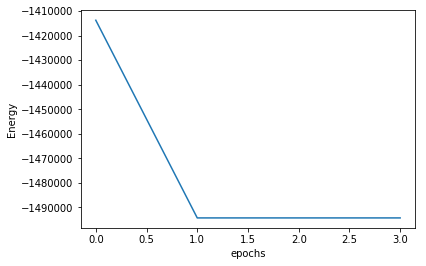

In [21]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
train_X = data[0:3].copy()
print(train_X.shape)
W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)
epochs = 4
x, energy_s = find_pattern_async_energy(data[10],W,epochs)

plt.figure()
plt.plot(np.arange(epochs),energy_s)
plt.xlabel("epochs")
plt.ylabel("Energy")

# 3.3.4

-1426.56680973297
-1324.9595154781514
-1454.4300234536981
-1523.024022838071
-1700.812004914511
-1821.0168776790579
-1674.439361306119
-1274.4184994176585
-1572.8243037563475
-1578.8838323717287
-1465.0812389044618
-1387.0545777174025
-1540.1397790089477
-1534.801285375896
-1607.3423549196482
-1447.773311696188
-1670.7801392297872
-1433.4603080987958
-1468.3645607893518
-1700.0244674291728


Text(0, 0.5, 'Energy')

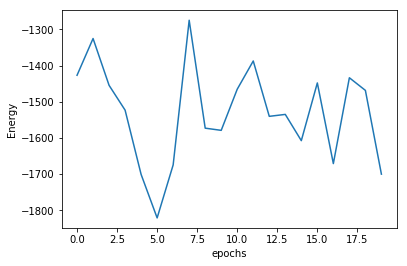

In [26]:
mu = 0
sigma = 0.1
W = np.random.normal(mu,sigma,(train_X.shape[1],train_X.shape[1]))

epochs = 20
x, energy_s = find_pattern_async_energy(data[10],W,epochs)

plt.figure()
plt.plot(np.arange(epochs),energy_s)
plt.xlabel("epochs")
plt.ylabel("Energy")

When weight init with random numbers the energy oscillates up and down without finding any attractors.

[[-0.03916122 -0.03932161  0.03137957 ... -0.03654489 -0.00344583
  -0.0163104 ]
 [-0.03932161 -0.0278889   0.03227836 ... -0.04770244  0.01814884
  -0.03446097]
 [ 0.03137957  0.03227836  0.0185556  ...  0.01799998  0.0770681
  -0.00596542]
 ...
 [-0.03654489 -0.04770244  0.01799998 ...  0.08815009 -0.0205439
   0.0852887 ]
 [-0.00344583  0.01814884  0.0770681  ... -0.0205439   0.06388866
  -0.03965946]
 [-0.0163104  -0.03446097 -0.00596542 ...  0.0852887  -0.03965946
   0.01099578]]
-2165.0865601473374
-2622.118908526848
-2808.469639974912
-2917.1441483188187
-2969.326048169006
-3009.09885709478
-3035.3005938999127
-3040.1660681169924
-3042.2149129984396
-3043.7735304096145
-3046.210620750988
-3047.6530456883206
-3047.137202089535
-3046.997725924988
-3047.137202089535
-3047.152499962318
-3047.6530456883206
-3047.137202089535
-3046.6969227005225
-3047.6530456883206


Text(0, 0.5, 'Energy')

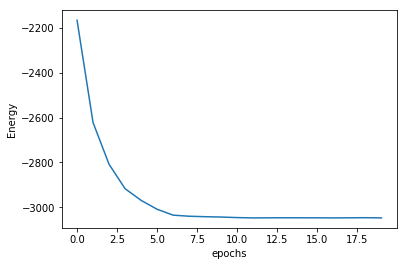

In [28]:
mu = 0
sigma = 0.1
W = np.random.normal(mu,sigma,(train_X.shape[1],train_X.shape[1]))
W =1/2*(W+W.T)
print(W)
epochs = 20
x, energy_s = find_pattern_async_energy(data[10],W,epochs)

plt.figure()
plt.plot(np.arange(epochs),energy_s)
plt.xlabel("epochs")
plt.ylabel("Energy")

It finds an attractor. Because a symmetric weight matrix means that we have a fully connected network and thus the proof of convergence for the energy function is applicable. (s. 352 Rojas)